## **K-NN**

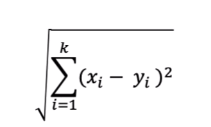 

#### **Python Libraries**

In [38]:
import numpy as np
import pandas as pd 
from termcolor import colored
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV

from warnings import filterwarnings
filterwarnings('ignore')

#### **Dataset**

In [12]:
hitters = pd.read_csv(r'C:\Users\AleynaCihangir\Desktop\MarketPlace PowerBrands Projects\Hitters.csv')
df = hitters.copy()
df = df.dropna()
df.reset_index(drop=True, inplace=True)
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
3,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
259,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
260,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
261,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [13]:
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

In [14]:
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### **Model**

In [21]:
knn_model = KNeighborsRegressor(n_neighbors = 10)
knn_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [56]:
dir(knn_model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_algorithm_metric',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tree',
 '_validate_data',
 '_y',
 'algorithm',
 'effective_metric_',
 'effective_metric_params_',
 'feature_names_in_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_features_in_',
 'n_jobs',
 'n_neighbors',
 'n_s

In [57]:
print(colored("\033[1m" + "Number of Neighbors are: ", "blue"), knn_model.n_neighbors) 
print(colored(knn_model.effective_metric_, "blue"))

Number of Neighbors are:  10
euclidean


#### **Predict**

In [58]:
y_pred = knn_model.predict(X_test)
print(colored("\033[1m" + "MSE: ", "blue"), np.sqrt(mean_squared_error(y_test, y_pred)), '\n') 
RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print(colored("\033[1m" + "For K = : ", "blue"), k, colored("\033[1m" + "the RMSE value = : ", "blue"), rmse) 

MSE:  421.6252180741266 

For K = :  1 the RMSE value = :  0.0
For K = :  2 the RMSE value = :  179.52761335480352
For K = :  3 the RMSE value = :  205.20157172291863
For K = :  4 the RMSE value = :  220.5139794876305
For K = :  5 the RMSE value = :  239.6467132541376
For K = :  6 the RMSE value = :  243.5904190007242
For K = :  7 the RMSE value = :  258.1478781634636
For K = :  8 the RMSE value = :  266.05374203349805
For K = :  9 the RMSE value = :  269.73782093553376
For K = :  10 the RMSE value = :  271.2798300436963


#### **Model Tuning**

In [59]:
knn_params = {'n_neighbors': np.arange(1,30,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)

In [60]:
print(colored("\033[1m" + "Output: ", "blue"), knn_cv_model.fit(X_train, y_train), '\n') 
print(colored("\033[1m" + "Num of Best Parameters: ", "blue"), knn_cv_model.best_params_["n_neighbors"]) 

Output:  GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])}) 

Num of Best Parameters:  8


In [63]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print(colored("\033[1m" + "For K = : ", "blue"), k, 
          colored("\033[1m" + "the RMSE value = : ", "blue"), rmse, 
          colored("\033[1m" + "the RMSE_CV value = : ", "blue"), rmse_cv) 

For K = :  1 the RMSE value = :  0.0 the RMSE_CV value = :  325.3947514706382
For K = :  2 the RMSE value = :  179.52761335480352 the RMSE_CV value = :  293.24000183333817
For K = :  3 the RMSE value = :  205.20157172291863 the RMSE_CV value = :  283.7486667487823
For K = :  4 the RMSE value = :  220.5139794876305 the RMSE_CV value = :  286.3240222024089
For K = :  5 the RMSE value = :  239.6467132541376 the RMSE_CV value = :  290.0705466132226
For K = :  6 the RMSE value = :  243.5904190007242 the RMSE_CV value = :  298.1263115575851
For K = :  7 the RMSE value = :  258.1478781634636 the RMSE_CV value = :  294.77070479194987
For K = :  8 the RMSE value = :  266.05374203349805 the RMSE_CV value = :  291.98672028891235
For K = :  9 the RMSE value = :  269.73782093553376 the RMSE_CV value = :  295.7162739573105
For K = :  10 the RMSE value = :  271.2798300436963 the RMSE_CV value = :  301.31047022701154


In [64]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])
print(colored("\033[1m" + "Model Tuning Fit: ", "blue"), knn_tuned.fit(X_train, y_train)) 
print(colored("\033[1m" + "Model Tuning RMSE: ", "blue"), np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))) 

Model Tuning Fit:  KNeighborsRegressor(n_neighbors=8)
Model Tuning RMSE:  413.7094731463598
